In [46]:
#Importing th libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

In [47]:
# read data into python as dataframe 
dataset = '/content/drive/MyDrive/FaciesClassifier/facies_vectors.csv'
training_data = pd.read_csv(dataset)
training_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [48]:
#Cleaning the data

training_data['Well Name'] = training_data['Well Name'].astype('category')
training_data['Formation'] = training_data['Formation'].astype('category')
training_data['Well Name'].unique()

['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
Categories (10, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NOLAN',
                          'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

In [49]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [50]:
training_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979,FSiS
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957,FSiS
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936,FSiS
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915,FSiS
...,...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685,MS
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677,MS
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669,MS
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661,MS


In [51]:
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [52]:
#This is a quick view of the statistical distribution of the input variables. 
#Looking at the count values, most values have 4149 valid values except for PE, which has 3232.
# In this tutorial we will drop the feature vectors that don't have a valid PE entry.
PE_mask = training_data['PE'].notnull().values
training_data = training_data[PE_mask]

In [53]:
blind = training_data[training_data['Well Name'] == 'NOLAN']
training_data = training_data[training_data['Well Name'] != 'NOLAN']

In [54]:
training_data.shape

(2817, 12)

In [55]:
#function will make it easy to plot the logs from multiples wells,
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.40')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

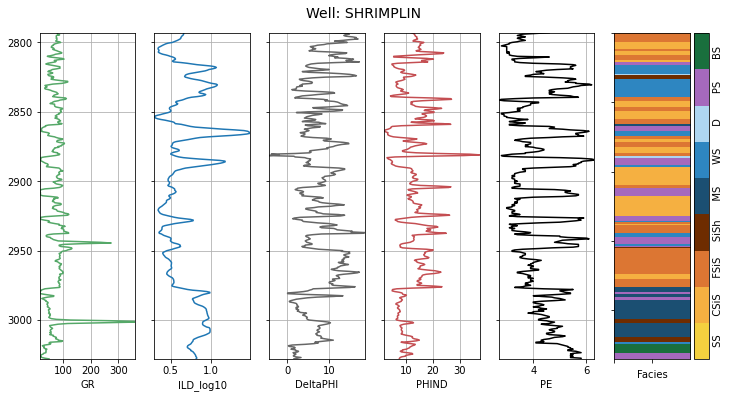

In [56]:
#We then show log plots for wells SHRIMPLIN
make_facies_log_plot(
    training_data[training_data['Well Name'] == 'SHRIMPLIN'],
    facies_colors)


SS      255
CSiS    620
FSiS    547
SiSh    156
MS      170
WS      432
D        94
PS      382
BS      161
Name: Facies, dtype: int64

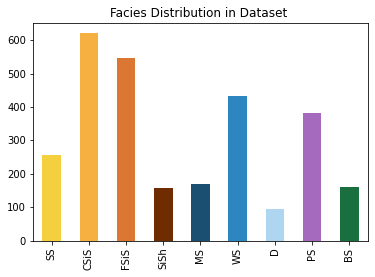

In [57]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Facies Distribution in Dataset ')
facies_counts


/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


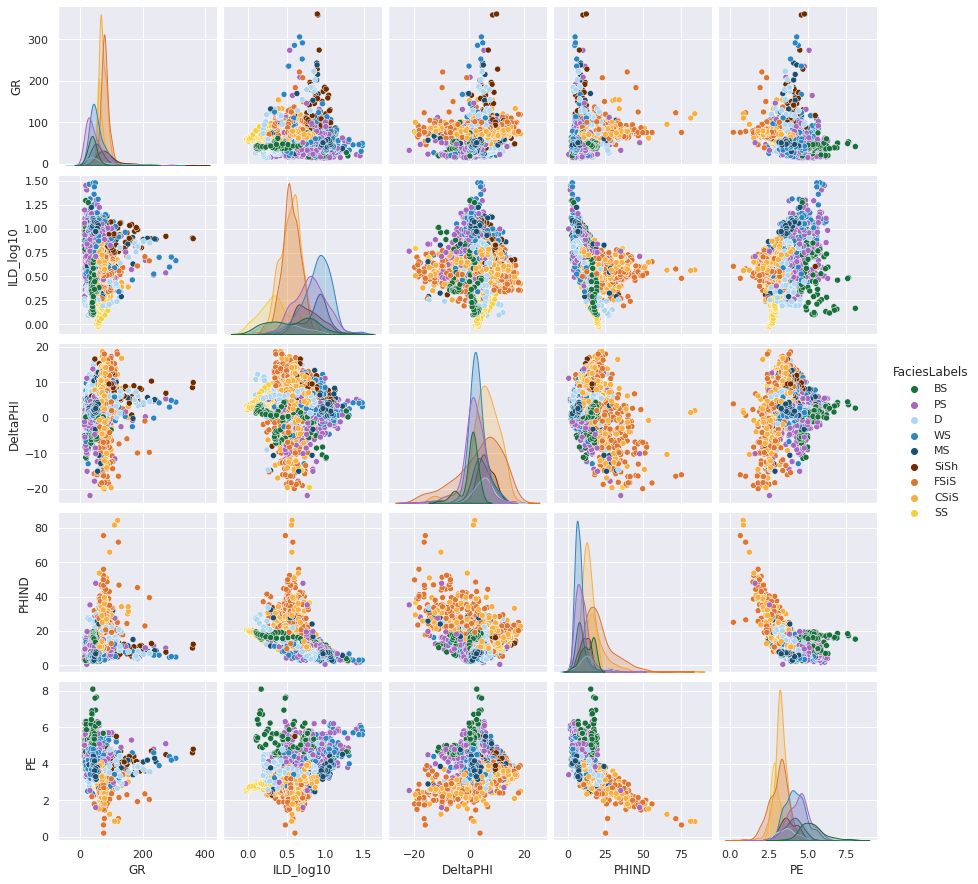

In [58]:
#Seaborn library is used  to quickly create a nice looking scatter matrix.
inline_rc = dict(mpl.rcParams)

sns.set()
sns.pairplot(training_data.drop(['Well Name','Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)))

#switch back to default matplotlib plot style
mpl.rcParams.update(inline_rc)

In [59]:
# Get correlation
training_data.corr()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Facies,1.000000,0.363199,-0.335827,0.434966,-0.221680,-0.360088,0.699465,0.860088,0.065094
Depth,0.363199,1.000000,-0.085619,0.207171,-0.087318,-0.059062,0.285313,0.313186,-0.015109
GR,-0.335827,-0.085619,1.000000,-0.147170,0.182982,0.247347,-0.299145,-0.268035,-0.186145
ILD_log10,0.434966,0.207171,-0.147170,1.000000,-0.109111,-0.520112,0.429270,0.547478,0.093388
DeltaPHI,-0.221680,-0.087318,0.182982,-0.109111,1.000000,-0.284355,0.047548,-0.151405,0.042295
PHIND,-0.360088,-0.059062,0.247347,-0.520112,-0.284355,1.000000,-0.589487,-0.487452,-0.030956
PE,0.699465,0.285313,-0.299145,0.429270,0.047548,-0.589487,1.000000,0.648681,0.017317
NM_M,0.860088,0.313186,-0.268035,0.547478,-0.151405,-0.487452,0.648681,1.000000,0.025896
RELPOS,0.065094,-0.015109,-0.186145,0.093388,0.042295,-0.030956,0.017317,0.025896,1.000000


(0.0, 9.0)

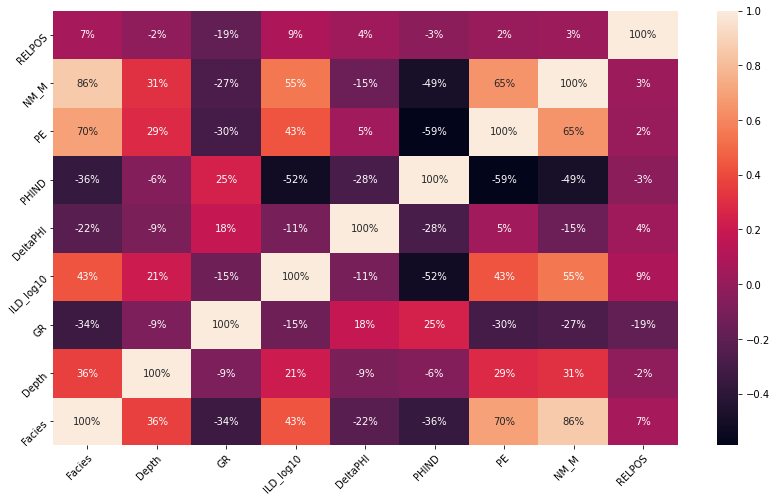

In [60]:
# Visualize data
%matplotlib inline
plt.figure(figsize=(14,8))

ax = sns.heatmap(training_data.corr(), annot=True, fmt ='.0%')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_ylim(len(training_data)-2817,9)

In [61]:
correct_facies_labels = training_data['Facies'].values
feature_vectors = training_data.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)

In [62]:
feature_vectors

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,78.260,0.661,14.200,12.565,4.100,1,0.979
2,79.050,0.658,14.800,13.050,3.600,1,0.957
3,86.100,0.655,13.900,13.115,3.500,1,0.936
4,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...
4144,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,51.469,0.965,3.083,7.708,3.152,2,0.661


In [63]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=10)

In [65]:
from sklearn import svm
SVM_model = svm.SVC(C=10, gamma=1)
SVM_model.fit(X_train,y_train)

SVC(C=10, gamma=1)

In [66]:
yhat_SVM = SVM_model.predict(X_test)

In [67]:

def display_cm(cm, labels, hide_zeros=False,
                             display_metrics=False):
  

    precision = np.diagonal(cm)/cm.sum(axis=0).astype('float')
    recall = np.diagonal(cm)/cm.sum(axis=1).astype('float')
    F1 = 2 * (precision * recall) / (precision + recall)
    
    precision[np.isnan(precision)] = 0
    recall[np.isnan(recall)] = 0
    F1[np.isnan(F1)] = 0
    
    total_precision = np.sum(precision * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_recall = np.sum(recall * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_F1 = np.sum(F1 * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    #print total_precision
    
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + " Pred",end=" ")
    for label in labels: 
        print ("%{0}s".format(columnwidth) % label,end=" ")
    print ("%{0}s".format(columnwidth) % 'Total')
    print()
    print ("    " + " True")
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1,end=" ")
        for j in range(len(labels)): 
            cell = "%{0}d".format(columnwidth) % cm[i, j]
            if hide_zeros:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            print (cell,end=" ")
        print ("%{0}d".format(columnwidth) % sum(cm[i,:]))
        
        print()
        
    if display_metrics:
        print()
        print ("Precision",end=" ")
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % precision[j]
            print (cell,end=" ")
        print ("%{0}.2f".format(columnwidth) % total_precision)
        print ()
        print ("   Recall",end=" ")
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % recall[j]
            print (cell,end=" ")
        print ("%{0}.2f".format(columnwidth) % total_recall)
        print()
        print ("       F1",end=" ")
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % F1[j]
            print (cell,end=" ")
        print ("%{0}.2f".format(columnwidth) % total_F1)
        print()
    
                  
def display_adj_cm(
        cm, labels, adjacent_facies, hide_zeros=False, 
        display_metrics=False):
    """This function displays a confusion matrix that counts 
       adjacent facies as correct.
    """
    adj_cm = np.copy(cm)
    
    for i in np.arange(0,cm.shape[0]):
        for j in adjacent_facies[i]:
            adj_cm[i][i] += adj_cm[i][j]
            adj_cm[i][j] = 0.0
        
    display_cm(adj_cm, labels, hide_zeros, 
                             display_metrics)

In [68]:
from sklearn.metrics import confusion_matrix


conf_SVM = confusion_matrix(y_test, yhat_SVM)
display_cm(conf_SVM, facies_labels, hide_zeros=True, display_metrics=True)


     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total

     True
       SS    42    10                                              52

     CSiS     6    83    23     1                       1         114

     FSiS     2    19    79     2     1     1           1         105

     SiSh                      29           6           2          37

       MS                       3    17     5           3          28

       WS                 2     3     7    75          11     2   100

        D           1     2           1          22     2     1    29

       PS                             7    12     2    53     2    76

       BS                 1                 1           1    20    23


Precision  0.84  0.73  0.74  0.76  0.52  0.75  0.92  0.72  0.80  0.75

   Recall  0.81  0.73  0.75  0.78  0.61  0.75  0.76  0.70  0.87  0.74

       F1  0.82  0.73  0.75  0.77  0.56  0.75  0.83  0.71  0.83  0.75



In [69]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

jSVM = jaccard_score(y_test, yhat_SVM,average='weighted')
f1SVM = f1_score(y_test, yhat_SVM, average='weighted')
print("SVM Jaccard index: %.3f" % jSVM )
print("SVM F1-score: %.3f" % f1SVM  )

SVM Jaccard index: 0.598
SVM F1-score: 0.746


In [70]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RFC_model = RandomForestClassifier(max_depth=12, n_estimators=20, max_features=6).fit(X_train, y_train)
yhat_RFC = RFC_model.predict(X_test)
jRFC  = jaccard_score(y_test, yhat_RFC,average='weighted')
f1RFC = f1_score(y_test, yhat_RFC, average='weighted')

print("RFC Jaccard index: %.3f" % jRFC )
print("RFC F1-score: %.3f" % f1RFC)
conf_RFC = confusion_matrix(y_test, yhat_RFC)
display_cm(conf_RFC, facies_labels, hide_zeros=True, display_metrics=True)

RFC Jaccard index: 0.522
RFC F1-score: 0.682
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total

     True
       SS    36    14     2                                        52

     CSiS     3    86    24                 1                     114

     FSiS     1    33    67     1     1                 2         105

     SiSh                      25     1     8           3          37

       MS                       2    14     6           6          28

       WS                 1     2     4    73     1    15     4   100

        D           1           1     1     2    17     5     2    29

       PS                       3     4    22     1    45     1    76

       BS                                   1                22    23


Precision  0.90  0.64  0.71  0.74  0.56  0.65  0.89  0.59  0.76  0.69

   Recall  0.69  0.75  0.64  0.68  0.50  0.73  0.59  0.59  0.96  0.68

       F1  0.78  0.69  0.67  0.70  0.53  0.69  0.71  0.59  0.85  0.68



In [71]:
#Neural Network
from sklearn.neural_network import MLPClassifier


NNC_model = MLPClassifier(alpha=0.001, max_iter=1000, learning_rate_init=0.001, 
                          solver='adam', batch_size=10, hidden_layer_sizes=200 ).fit(X_train, y_train)

yhat_NNC = NNC_model.predict(X_test)
jNNC  =  jaccard_score(y_test, yhat_NNC,average='weighted')
f1NNC =  f1_score(y_test, yhat_NNC, average='weighted')

print("NNC Jaccard index: %.3f" %jNNC)
print("NNC F1-score: %.3f" %f1NNC )
conf_NNC = confusion_matrix(y_test, yhat_NNC)
display_cm(conf_NNC, facies_labels, hide_zeros=True, display_metrics=True)

NNC Jaccard index: 0.551
NNC F1-score: 0.707
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total

     True
       SS    41    10     1                                        52

     CSiS     7    79    27     1                                 114

     FSiS     3    19    79     1           1           2         105

     SiSh                      26     1     6           4          37

       MS                       4    13     6           5          28

       WS                       4     4    67     1    22     2   100

        D           1                 2          18     6     2    29

       PS                             4    12     2    55     3    76

       BS                                   1           1    21    23


Precision  0.80  0.72  0.74  0.72  0.54  0.72  0.86  0.58  0.75  0.71

   Recall  0.79  0.69  0.75  0.70  0.46  0.67  0.62  0.72  0.91  0.71

       F1  0.80  0.71  0.75  0.71  0.50  0.69  0.72  0.64  0.82  0.71



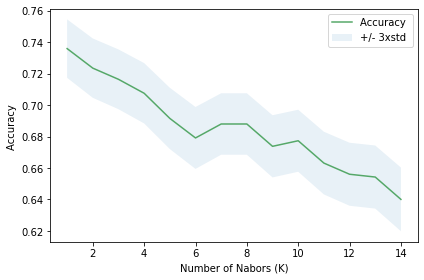

KNN Jaccard index: 0.565
KNN F1-score: 0.717
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total

     True
       SS    40    10     2                                        52

     CSiS     5    78    30     1                                 114

     FSiS     2    21    77     1     1     1           2         105

     SiSh                      27     1     7           2          37

       MS                       4    15     5           4          28

       WS                 1     3     5    73          15     3   100

        D           1                 1          24     2     1    29

       PS                            10    14     1    48     3    76

       BS                                               1    22    23


Precision  0.85  0.71  0.70  0.75  0.45  0.73  0.96  0.65  0.76  0.72

   Recall  0.77  0.68  0.73  0.73  0.54  0.73  0.83  0.63  0.96  0.72

       F1  0.81  0.70  0.72  0.74  0.49  0.73  0.89  0.64  0.85  0.72



In [72]:
#K Nearest neighbors
from sklearn import neighbors

from sklearn.neighbors import KNeighborsClassifier
# to chose the best k value we may run in range of valus 
Ks =15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusMtx = [];

for n in range(1,Ks):
    KNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = KNN_model.predict(X_test)
    
    mean_acc[n-1]= np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

k = 5    #it seems 5 is good enough
KNN_model = KNeighborsClassifier(n_neighbors=k ,leaf_size=50, p=1,  weights='distance' ).fit(X_train, y_train)
KNN_model
#plot
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


yhat_KNN = KNN_model.predict(X_test)
jKNN  = jaccard_score(y_test, yhat_KNN,average='weighted')
f1KNN = f1_score(y_test, yhat_KNN, average='weighted')
print("KNN Jaccard index: %.3f" % jKNN )
print("KNN F1-score: %.3f" % f1KNN  )


conf_KNN = confusion_matrix(y_test, yhat_KNN)
display_cm(conf_KNN, facies_labels, hide_zeros=True, display_metrics=True)

In [73]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 25, min_samples_split=3 )
DT_model.fit(X_train,y_train)
DT_model

yhat_DT = DT_model.predict(X_test)
jDT  = jaccard_score(y_test, yhat_DT,average='weighted')
f1DT = f1_score(y_test, yhat_DT, average='weighted')
print("DT Jaccard index: %.3f" % jDT )
print("DT F1-score: %.3f" % f1DT )


conf_DT = confusion_matrix(y_test, yhat_DT)
display_cm(conf_DT, facies_labels, hide_zeros=True, display_metrics=True)

DT Jaccard index: 0.435
DT F1-score: 0.599
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total

     True
       SS    37    13     2                                        52

     CSiS     6    74    32           1     1                     114

     FSiS     1    33    65           2     1           3         105

     SiSh                      21     3     7     1     4     1    37

       MS           1           2    13     7     1     4          28

       WS                 2     4    19    49          22     4   100

        D           1           1     4     1    17     3     2    29

       PS                       1     6    25     2    40     2    76

       BS                                   1           3    19    23


Precision  0.84  0.61  0.64  0.72  0.27  0.53  0.81  0.51  0.68  0.61

   Recall  0.71  0.65  0.62  0.57  0.46  0.49  0.59  0.53  0.83  0.59

       F1  0.77  0.63  0.63  0.64  0.34  0.51  0.68  0.52  0.75  0.60



In [74]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=1).fit(X_train,y_train)
LR_model

yhat_LR = LR_model.predict(X_test)
jLR  = jaccard_score(y_test, yhat_LR,average='weighted')
f1LR = f1_score(y_test, yhat_LR, average='weighted')
print("LR Jaccard index: %.3f" % jLR )
print("LR F1-score: %.3f" % f1LR )

conf_LR = confusion_matrix(y_test, yhat_LR)
display_cm(conf_LR, facies_labels, hide_zeros=True, display_metrics=True)

LR Jaccard index: 0.416
LR F1-score: 0.577
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total

     True
       SS    36    16                                              52

     CSiS     8    82    22                 1           1         114

     FSiS     1    44    53     2     1     1     1     2         105

     SiSh                      18          18           1          37

       MS                       3     1    18     1     5          28

       WS                       3     2    71     3    20     1   100

        D                 1     3           3    15     6     1    29

       PS                       1     3    24     2    38     8    76

       BS                                   1           4    18    23


Precision  0.80  0.58  0.70  0.60  0.14  0.52  0.68  0.49  0.64  0.59

   Recall  0.69  0.72  0.50  0.49  0.04  0.71  0.52  0.50  0.78  0.59

       F1  0.74  0.64  0.59  0.54  0.06  0.60  0.59  0.50  0.71  0.58



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [75]:
# create dictionary with calculated errors as variables
data_frame1 ={'Model type': ['SVM', 'RFC', 'NNC', 'KNN', 'DT', 'LR'],
       'Jaccard index': [jSVM, jRFC, jNNC, jKNN, jDT, jLR],
       'F1-Score': [f1SVM, f1RFC, f1NNC, f1KNN, f1DT, f1LR]
            }
df1 = pd.DataFrame(data_frame1, columns = ['Model type','Jaccard index','F1-Score' ] )
df1.round(2)

,Model type,Jaccard index,F1-Score
0,SVM,0.60,0.75
1,RFC,0.52,0.68
2,NNC,0.55,0.71
3,KNN,0.57,0.72
4,DT,0.44,0.60
5,LR,0.42,0.58


In [76]:
y_blind = blind['Facies'].values
blind_features = blind.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)
X_blind = scaler.transform(blind_features)

In [77]:
#SVM
yhat_blind_SVM = SVM_model.predict(X_blind)
blind['SVM_Pred'] = yhat_blind_SVM

#RFC
yhat_blind_RFC = RFC_model.predict(X_blind)
blind['RFC_Pred'] = yhat_blind_RFC

#NNC
yhat_blind_NNC = NNC_model.predict(X_blind)
blind['NNC_Pred'] = yhat_blind_NNC

#KNN
yhat_blind_KNN = KNN_model.predict(X_blind)
blind['KNN_Pred'] = yhat_blind_KNN

#DT
yhat_blind_DT = DT_model.predict(X_blind)
blind['DT_Pred'] = yhat_blind_DT

#LR
yhat_blind_LR = LR_model.predict(X_blind)
blind['LR_Pred'] = yhat_blind_LR

In [78]:
#SVM
jSVM_b =  jaccard_score(y_blind, yhat_blind_SVM,average='weighted')
f1SVM_b = f1_score(y_blind, yhat_blind_SVM, average='weighted')


#RFC
jRFC_b =jaccard_score(y_blind, yhat_blind_RFC,average='weighted')
f1RFC_b=f1_score(y_blind, yhat_blind_RFC, average='weighted')

#NNC
jNNC_b  =jaccard_score(y_blind, yhat_blind_NNC,average='weighted')
f1NNC_b =f1_score(y_blind, yhat_blind_NNC, average='weighted')


#KNN
jKNN_b = jaccard_score(y_blind, yhat_blind_KNN,average='weighted')
f1KNN_b = f1_score(y_blind, yhat_blind_KNN, average='weighted')


#DT
jDT_b = jaccard_score(y_blind, yhat_blind_DT,average='weighted')
f1DT_b =f1_score(y_blind, yhat_blind_DT, average='weighted')


#LR
jLR_b  = jaccard_score(y_blind, yhat_blind_LR,average='weighted')
f1LR_b = f1_score(y_blind, yhat_blind_LR, average='weighted')


In [79]:
data_frame2 ={'Model type': ['SVM', 'RFC', 'NNC', 'KNN', 'DT', 'LR'],
       'Jaccard index': [jSVM_b,jRFC_b, jNNC_b, jKNN_b, jDT_b, jLR_b],
       'F1-Score': [f1SVM_b, f1RFC_b, f1NNC_b, f1KNN_b, f1DT_b, f1LR_b]
            }
df2 = pd.DataFrame(data_frame2, columns = ['Model type','Jaccard index','F1-Score' ] )
df2.round(2)

,Model type,Jaccard index,F1-Score
0,SVM,0.34,0.49
1,RFC,0.34,0.48
2,NNC,0.39,0.54
3,KNN,0.35,0.51
4,DT,0.31,0.45
5,LR,0.35,0.48


In [80]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

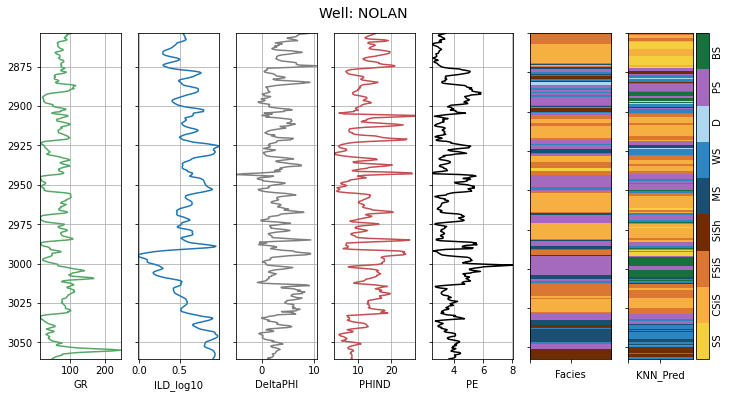

In [81]:
#let's plot KNN result
compare_facies_plot(blind, 'KNN_Pred', facies_colors)
#plt.savefig("KNN.png", dpi=400)

In [82]:
def compare_all_facies(logs, Pred1, Pred2, Pred3, Pred4, Pred5, Pred6, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[Pred1].values,1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs[Pred2].values,1), 100, 1)
    cluster4 = np.repeat(np.expand_dims(logs[Pred3].values,1), 100, 1)
    cluster5 = np.repeat(np.expand_dims(logs[Pred4].values,1), 100, 1)
    cluster6 = np.repeat(np.expand_dims(logs[Pred5].values,1), 100, 1)
    cluster7 = np.repeat(np.expand_dims(logs[Pred6].values,1), 100, 1)
    

   
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(12, 6))

    im1 = ax[0].imshow(cluster1, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[1].imshow(cluster2, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im3 = ax[2].imshow(cluster3, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im4 = ax[3].imshow(cluster4, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im5 = ax[4].imshow(cluster5, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im6 = ax[5].imshow(cluster6, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im7 = ax[6].imshow(cluster7, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    
       
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="10%", pad=0.05)
    cbar=plt.colorbar(im7, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-8):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=2)
    
    ax[0].set_xlabel('Facies'); ax[1].set_xlabel(Pred1); ax[2].set_xlabel(Pred2)
    ax[3].set_xlabel(Pred3); ax[4].set_xlabel(Pred4); ax[5].set_xlabel(Pred5)
    ax[6].set_xlabel(Pred6)
    
    #ax[0].set_yticklabels([]) ;
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]) 
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[7].set_yticklabels([])
    
    ax[0].set_xticklabels([]); ax[1].set_xticklabels([]); ax[2].set_xticklabels([])
    ax[3].set_xticklabels([]); ax[4].set_xticklabels([]); ax[5].set_xticklabels([])
    ax[6].set_xticklabels([]); ax[7].set_xticklabels([])

    f.suptitle('Various model predictions in well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

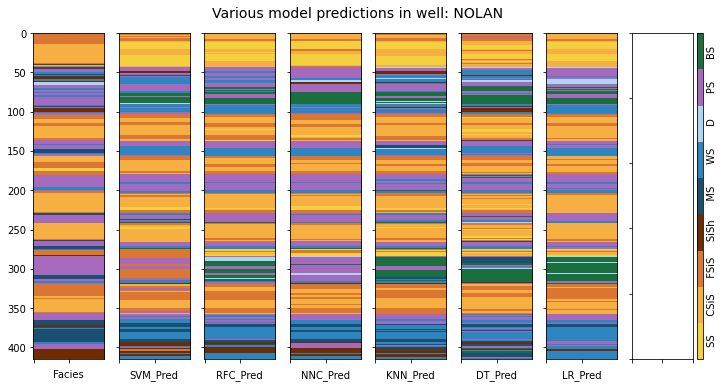

In [83]:
compare_all_facies(blind,'SVM_Pred','RFC_Pred', 'NNC_Pred', 'KNN_Pred','DT_Pred', 'LR_Pred', facies_colors)
plt.savefig("Compo.png", dpi=400)